# The ML Modeling Process Basics 
In this notebook, we will go through some of the basic techinques for modeling data. 
In this case, we will be trying to predict if we can predict a stroke from the above dataset. 

We will cover:
- Baseline creation
- Model selection
- Parameter tuning
     - manual
     - gridsearch
     - random search
     - basian optomization
- Ensemble models

### On the Data 
This dataset is a good representation of real world data that can have valuable impact when analyzed. We will be exploring the accuracy of different models for predicting if someone will purchase an auto insurance policy or not. We will first lightly explore the data, create our train, test / validation sets, then we will ceate a baseline model. To get the best results we will compare other algorithms to our basline and use various parameter tuning techniques to see which model produces the best results. At the end we will explore some ensemble models to see what produces the best results. 



In [1]:
# libraries

import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('../data/Cross_sell_prediction.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe(include=np.object_)

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
for i in df.select_dtypes(include=["object"]).columns:
    print(df[i].value_counts())

Gender
Male      206089
Female    175020
Name: count, dtype: int64
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


In [10]:
#dropping variable for now, but could likely be used to imrove our models with some engineering! 
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [19]:
trimed_df = df.loc[:, ['Gender','Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage','Response']]

In [20]:
trimed_df


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,1,1-2 Year,No,30170.0,88,0
381105,Male,30,1,1,< 1 Year,No,40016.0,131,0
381106,Male,21,1,1,< 1 Year,No,35118.0,161,0
381107,Female,68,1,0,> 2 Years,Yes,44617.0,74,0


In [21]:
trimed_df.shape

(381109, 9)

In [23]:
#drop null values and create dummy variables
df_final = pd.get_dummies(trimed_df).dropna()

In [24]:
df_final.shape

(381109, 13)

In [25]:
df_final.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,0,40454.0,217,1,False,True,False,False,True,False,True
1,76,1,0,33536.0,183,0,False,True,True,False,False,True,False
2,47,1,0,38294.0,27,1,False,True,False,False,True,False,True
3,21,1,1,28619.0,203,0,False,True,False,True,False,True,False
4,29,1,1,27496.0,39,0,True,False,False,True,False,True,False


In [26]:
df_final.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='Frequency'>

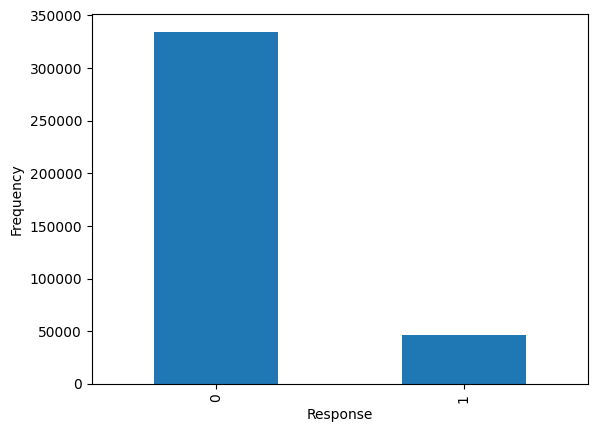

In [30]:
df_final["Response"].value_counts().plot(kind="bar", xlabel="Response", ylabel="Frequency")

In [31]:
#Create train test split 

from sklearn.model_selection import train_test_split
X = df_final.drop('Response', axis =1)
y = df_final.loc[:,['Response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Basline Model
How can we tell if our machine learning models are any good? To evaluate performance, we need to benchmark against something. In this case, we will create two baslines for our model. First, we can simply look at the average of our data for a numeric value. If we were going to predict the age, we could simply guess the average age for every candidate. 

On the other hand, for a categorical variable, we could simply guess 50/50 or the ratio of the categories in the data. In this case, the conversion data is imbalanced with 46710/ 334399 samples being of the non-stroke cateogry. That means that if we guessed that everyone in the sample didn't have a stroke, we would have a 86.0% success rate. Since this data is slightly imblanaced, this would not be a good baseline for our model.

One of the most important steps that we need to take is choosing a good evluation metric. The notebook that covers specific evaluation metrics can be located here: 

Accuracy does not make sense because of the imbalanced nature of the data. For this example we will use F1 score as our model evaluation metric.

- F1 is calculated by 2*((precision*recall)/(precision+recall))

- Instead of a simple accuracy calculation which would give us a baseline of 96.1%, F1 score gives us an undefined number since both the precision and recall of a model that only predicted negatives would equal 0. 

- In this case, we want to use a simple basleline model like Naive Bayes to set our baseline based off of f1 score. You can use most models to create a baseline, but I like Naive bayes because it is quick and doesn't require much parameter tuning. (Full breakdown of Naieve Bayes in or Algorithms Course)

In [32]:
#import cross validation score
from sklearn.model_selection import cross_val_score

#import Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB

#run cv for NB classifier
from sklearn.metrics import classification_report

In [33]:
#create classifier object
nb = GaussianNB()



In [39]:
model_acc = cross_val_score(nb, X_train, y_train, cv=3, scoring='accuracy')

/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print('nb_accuracy: ' +str(model_acc))


nb_accuracy: [0.74467535 0.74676413 0.7414113 ]


# Model Comparison & Selection 
After we have a baseline model to compare against, we want to evaluate how other models might perform on the same data. I like to experiment with other basic models with very little paramater tuning to see what performs well. This isn't an exact science and many people may do this step differently. After we set up the models, we can begin experimenting with parameter tuning. I find that model selection and parameter tuning is often an iterative process. For an analysis like this, trying different models, changing parameters, and experimenting with new engineered features is where I find myself spending most of my time working. 

In this section we will try:
- Logistic regression
- Decision Tree
- K Nearest Neighbors (KNN)

In [44]:
#Let's now experiment with a few different basic models 

## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =32)

dt_accuracy = cross_val_score(dt,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')


print('dt_accuracy: ' +str(dt_accuracy))


dt_accuracy: [0.82060365 0.82309812 0.82119764]


In [47]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=32, max_iter = 2000, class_weight = 'balanced')

lr_accuracy = cross_val_score(lr,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')


print('lr_accuracy: ' +str(lr_accuracy))


/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr_accuracy: [0.63642804 0.6404948  0.63610908]


/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
